# Stuart Harley

### Machine Learning Week 3 Problem Set

### 1)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from IPython.display import Image
iris_datapath = '/data/cs3400/datasets/IRIS.csv'

In [2]:
peak_df = pd.read_csv('peak_lfc.csv')

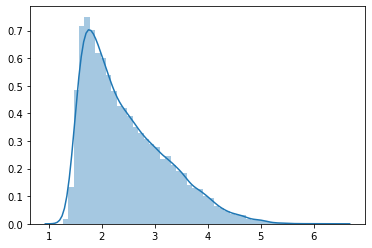

In [3]:
sns.distplot(peak_df);

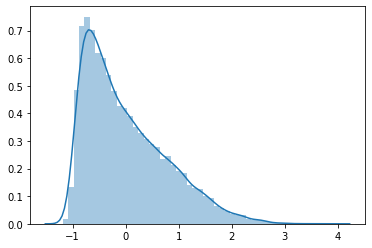

In [4]:
mean = peak_df.mean()
peak_centered_df = peak_df - mean
sns.distplot(peak_centered_df);

When we center the data, the values of the data are now evenly spread around 0. So the x-axis is shifted in the graph

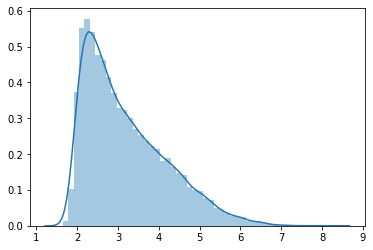

In [5]:
std = peak_df.std()
peak_scaled_df = peak_df / std
sns.distplot(peak_scaled_df);

When we scale the data, the standard deviation of the data is now 1. So the values in this graph became more spread out.

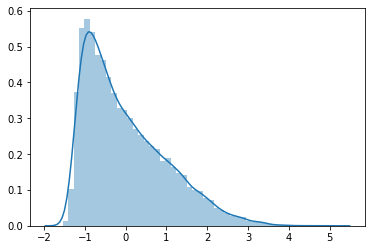

In [6]:
peak_cs_df = (peak_df - mean) / std
sns.distplot(peak_cs_df);

With the data scaled and centered, the data is shifted to the left on the x-axis and more spread out.

### 2)

P(y=1|x) = 1 / 1+e^−(−20.96 − 123.08x1 + 40.46x2)

0 = -20.96 - 123.08x1 + 40.46x2

-40.46x2 = -20.96 - 123.08x1

x2 = .518 + 3.042x1

In [7]:
def x2(x1):
    return .518 + 3.042 * x1;

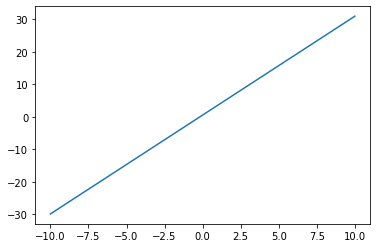

In [8]:
x1 = np.linspace(-10, 10, 3)
x2 = x2(x1)
plt.figure()
plt.plot(x1, x2);

P(y=1|x) = 1 / 1+e^−(259.55 − 27.15x1 − 30.49x2)

0 = 259.55 - 27.15x1 - 30.49x2

30.49x2 = 259.55 - 27.15x1

x2 = 8.513 - .890x1

In [9]:
def x2(x1):
    return 8.513 - .890 * x1;

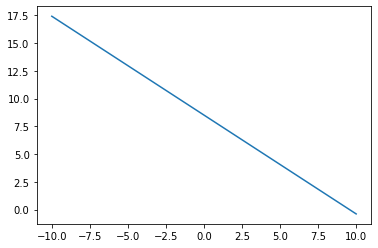

In [10]:
x1 = np.linspace(-10, 10, 3)
x2 = x2(x1)
plt.figure()
plt.plot(x1, x2);

P(y=1|x) = 1 / 1+e^−(−26.7 − 284.7x1 + 284.9x2 − 64.6x3)

0 = -26.7 - 287.1x1 + 284.9x2 - 64.6x3

64.6x3 = -26.7 - 287.1x1 + 284.9x2

x3 = -.413 - 4.444x1 + 4.410x2

In [11]:
def x3(x1, x2):
    return -.413 - 4.444 * x1 + 4.410 * x2;

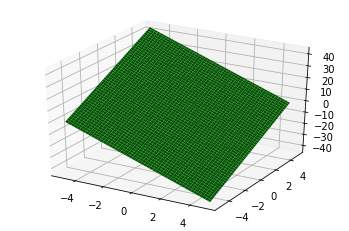

In [12]:
fig = plt.figure()
axes = plt.axes(projection='3d')
x1 = x2 = np.arange(-5, 5, .05)
X1, X2 = np.meshgrid(x1, x2)
x3 = np.array(x3(np.ravel(X1), np.ravel(X2)))
X3 = x3.reshape(X1.shape)
axes.plot_surface(X1, X2, X3, color='g');

### 3)

I understood everything for this except the F3 column. You said in class that it was the regression. And so regression is either mean or median. But that didn't make sense with the values given in the data. 

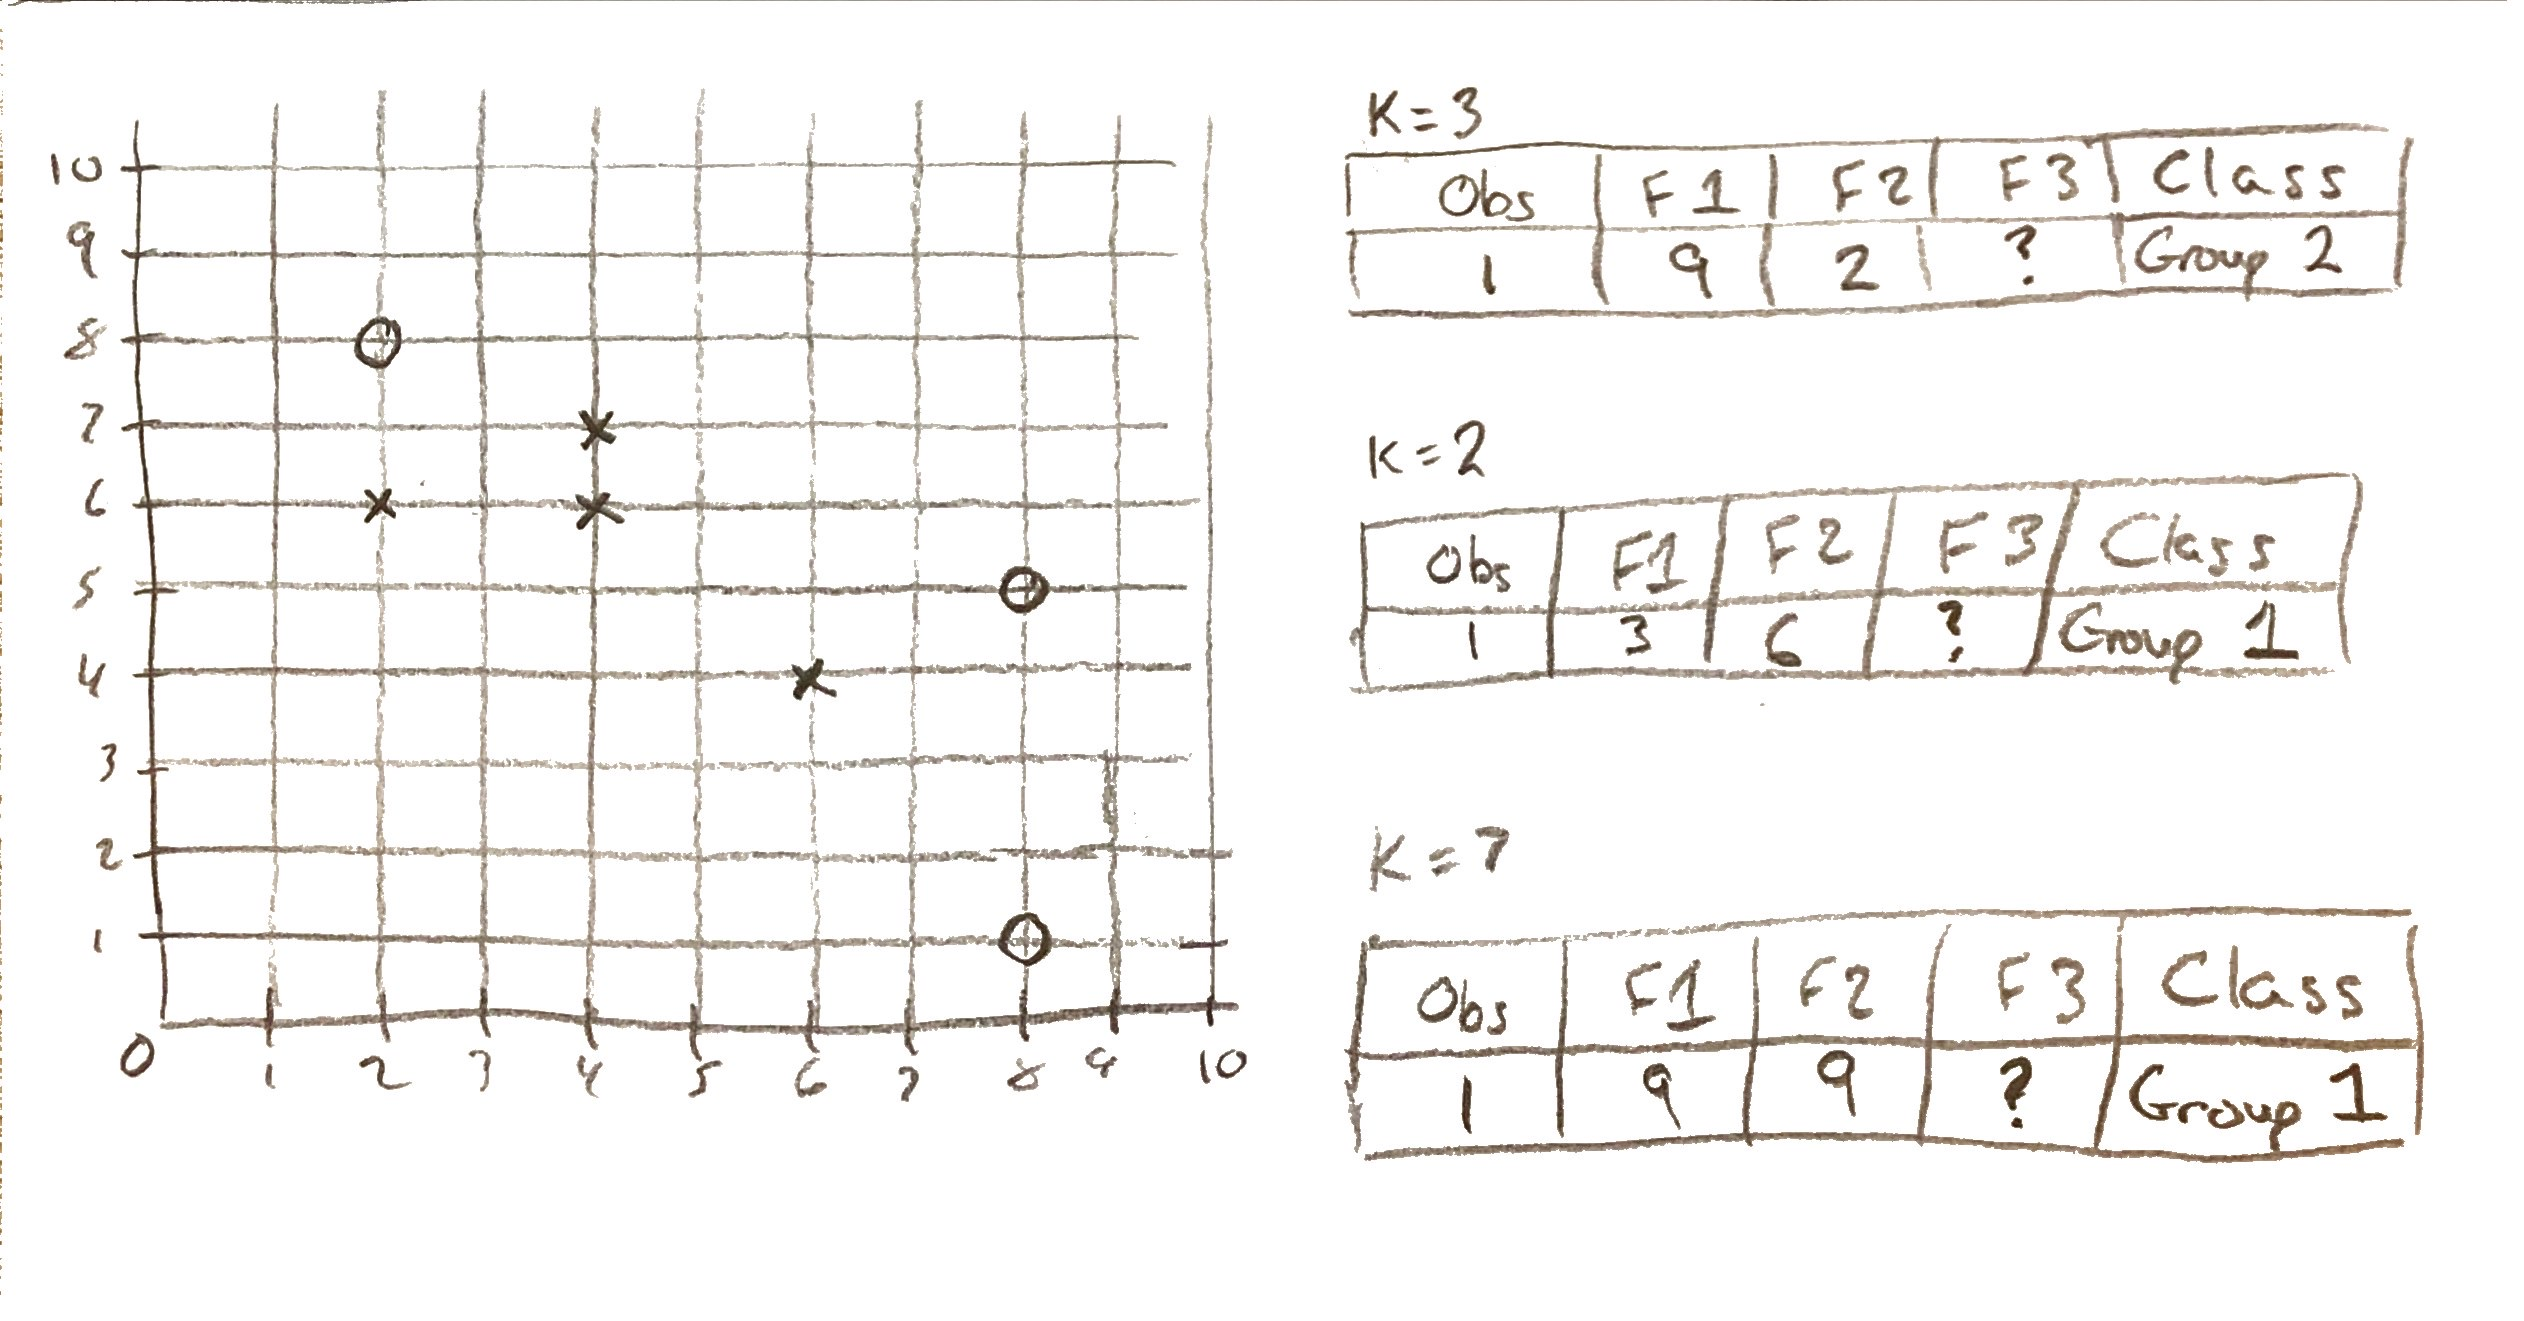

In [13]:
Image('KNN Hw prob.jpeg')

### 4)

P(y=1) | y | Per-Sample Likelihood

  0.99 | 1 | .99
   
  0.99 | 1 | .99
  
  0.01 | 0 | .99
  
  0.01 | 0 | .99
  
  0.99 | 1 | .99
  
Overall likelihood : .951

P(y=1) | y | Per-Sample Likelihood

  0.01       | 1 | .01
   
  0.01       | 1 | .01
  
  0.99       | 0 | .01
  
  0.99       | 0 | .01
  
  0.01       | 1 | .01
  
Overall likelihood : .0000000001 (1 * 10^-10)

P(y=1) | y | Per-Sample Likelihood

  0.75 | 1 | .75
   
  0.99 | 1 | .99
  
  0.25 | 0 | .75
  
  0.01 | 0 | .99
  
  0.99 | 1 | .99
  
Overall likelihood : .496

The best possible likelihood value is 99.9 repeating percent, effectively 100. And the worst is .000 repeating 1 percent. Effectively 0.

### 5)

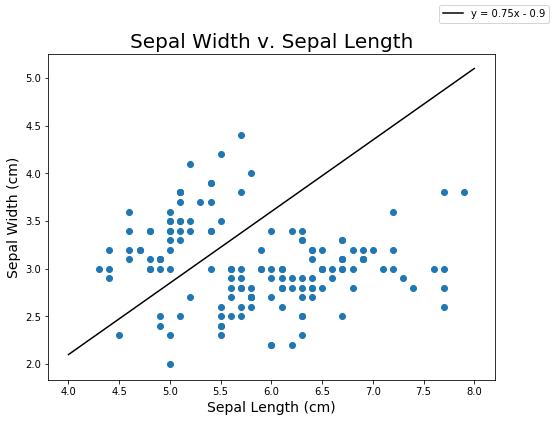

In [14]:
iris = np.loadtxt(iris_datapath, delimiter=',', skiprows=1, usecols=(0,1))

plot, axes = plt.subplots(figsize=(8, 6))
axes.scatter(iris[:, 0], iris[:, 1])
axes.set_xlabel('Sepal Length (cm)', fontsize=14)
axes.set_ylabel('Sepal Width (cm)', fontsize=14)
axes.set_title('Sepal Width v. Sepal Length', fontsize=20)

def y(x):
    return .75 * x - 0.9;

x = np.linspace(4, 8, 2)
y = y(x)
axes.plot(x, y, 'k', label='y = 0.75x - 0.9')
plot.legend();

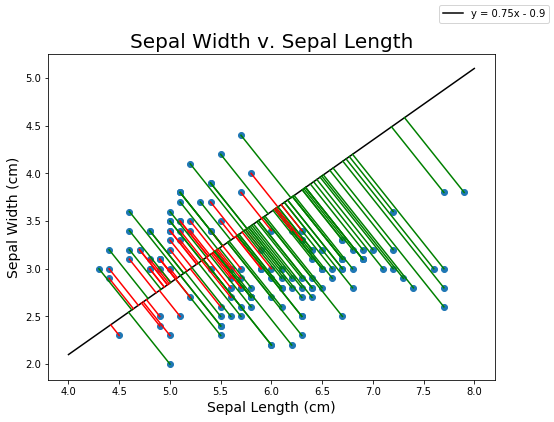

In [15]:
def get_b(x, y):
    return y + (4/3) * x

M = np.linalg.matrix_power(np.array([[3/4, -1],[-4/3, -1]]), -1)

for row in iris:
    b = get_b(row[0], row[1]) * -1
    (x, y) = np.matmul(M, np.array([.9, b]))
    dist = np.linalg.norm(row - np.array([x,y]))
    if(dist < .5):
        axes.plot([x, row[0]], [y, row[1]], color='r')
    else:
        axes.plot([x, row[0]], [y, row[1]], color='g')
        
plot